# Assignment 3

#### 1. Generate a figure from the given dataset that resembles Figure 1.

In [136]:
import pandas as pd

df = pd.read_csv("spiral-dataset.csv", delimiter='\t',header=None,names=['x','y','Class'])
df.head()

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [137]:
class_1_df = df.loc[df['Class'] == 1]
class_2_df = df.loc[df['Class'] == 2]
class_3_df = df.loc[df['Class'] == 3]
class_3_df

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
101,21.85,15.25,3
102,21.75,15.15,3
103,21.65,15.05,3
104,21.55,15.00,3


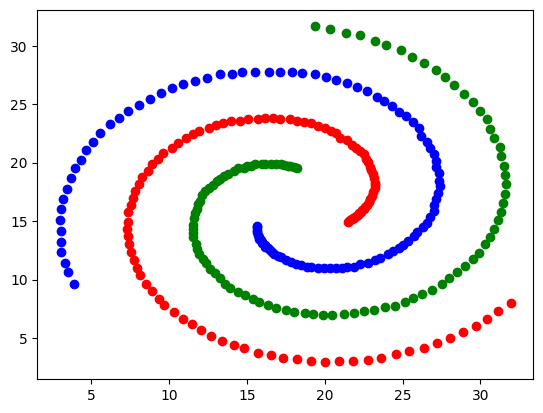

In [138]:
import matplotlib.pyplot as plt

plt.scatter(class_1_df['x'], class_1_df['y'], color='g')
plt.scatter(class_2_df['x'], class_2_df['y'], color='b')
plt.scatter(class_3_df['x'], class_3_df['y'], color='r')
plt.show()


#### 2. Implement the k-means clustering algorithm. And do the following:
**a)**
- Run your k-means algorithm on the given dataset setting the value k=3 (because
    visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids. 

In [139]:
# split into training and test set
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_train.head()

(249, 2) (249,)
(63, 2) (63,)


64     3
34     3
137    1
264    2
81     3
Name: Class, dtype: int64

In [140]:
import random
import numpy as np 

def df_to_list():
    return list(X_train.values)

def choose_centroids(data, k):
    # choose random centroids
    return random.sample(data, k)  

def assign_clusters(data,centroids):
    k = len(centroids)
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for point in data: 
        euclid_distance = []
        for i in range(k):
            euclid_distance.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
        clusters[euclid_distance.index(min(euclid_distance))].append(point)

    return clusters

def recalculate_centroids(clusters, centroids, k ):
    for i in range(k):
        centroids[i] = np.mean(clusters[i],axis=0)
    return centroids

for i in range(300):
    data = df_to_list()
    centroids = choose_centroids(data,3)
    clusters = assign_clusters(data, centroids)
    solution = recalculate_centroids(clusters, centroids, 3)
print(centroids)
print(clusters)

[array([18.40752688, 22.85913978]), array([25.58275862,  7.21551724]), array([16.55944882, 13.0515748 ])]
{0: [array([17.15, 23.75]), array([22.9 , 19.65]), array([ 8.3 , 18.75]), array([29.95, 24.45]), array([15. , 19.7]), array([13.55, 18.85]), array([ 5.15, 21.8 ]), array([21.  , 22.15]), array([27.35, 18.45]), array([ 8.65, 19.3 ]), array([26.6, 21.8]), array([16.2, 19.9]), array([ 6.2, 23.3]), array([14.15, 19.25]), array([ 8.05, 24.95]), array([22.  , 21.25]), array([19.35, 31.65]), array([13.8 , 19.05]), array([23.95, 30.05]), array([11.95, 22.7 ]), array([22.65, 20.35]), array([20.4, 22.7]), array([ 3.7, 18.7]), array([23.1, 19. ]), array([10.9 , 26.75]), array([28.95, 25.85]), array([23.2 , 30.45]), array([21.75, 21.55]), array([22.25, 30.9 ]), array([18.55, 27.7 ]), array([15.7 , 23.75]), array([18.65, 23.5 ]), array([ 5.6, 22.5]), array([25.65, 23.45]), array([20.35, 31.45]), array([ 4.7, 21.1]), array([31.35, 20.55]), array([22.25, 21.  ]), array([22.75, 20.05]), array([10.

In [155]:
training_set = pd.concat([X_train, y_train])
training_1 = training_set.loc[df['Class'] == 1]
training_2 = training_set.loc[df['Class'] == 2]
training_3 = training_set.loc[df['Class'] == 3]


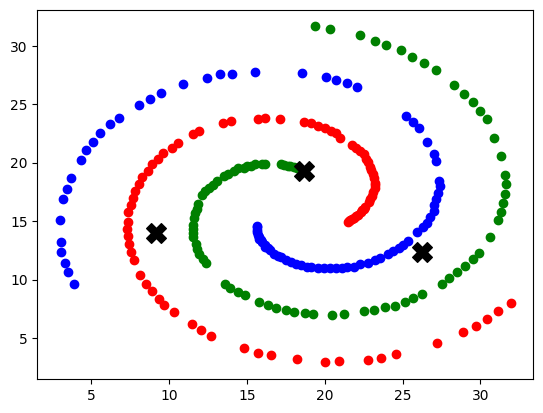

In [156]:
plt.scatter(training_1['x'], training_1['y'], color='g')
plt.scatter(training_2['x'], training_2['y'], color='b')
plt.scatter(training_3['x'], training_3['y'], color='r')
for centroid in (centroids):
    plt.scatter(centroid[0], centroid[1], color="black", edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
plt.show()


**b)**
- Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better).

In [143]:
def calculate_SSE(clusters, centroids):
    sse = 0
    for i, cluster in clusters.items():
        for point in cluster:
            sse += np.linalg.norm(np.array(point) - np.array(centroids[i])) ** 2
    return sse

SSE = calculate_SSE(clusters,centroids)
print("SSE:", float(SSE))

SSE: 14280.714705374006


In [164]:

from sklearn.metrics import adjusted_rand_score
def calculate_RI(centroids):
    labels_pred = []
    for point in X_train.values:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_label = distances.index(min(distances))
        labels_pred.append(cluster_label)
    rand_index = adjusted_rand_score(y_train, labels_pred)
    return rand_index

RI = calculate_RI(centroids)
print("RI:", RI)

RI: 0.019241373646467524


**2c)**
    Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report out of the 10 runs of k-means what is the best SSE & RI you could get.
    
**2d)**
    Please draw the clustering results (like Figure 1).

In [165]:
# second round
centroids_dict = {}
clusters_arr = []
SSE = []
RI_arr = []

for rounds in range(9):
    # centroids_dict[rounds] = 0    
    for i in range(300):
        data = df_to_list()
        centroids = choose_centroids(data,3)
        clusters = assign_clusters(data, centroids)
        solution = recalculate_centroids(clusters, centroids, 3)
    sse = calculate_SSE(clusters, centroids)
    SSE.append(sse)

    ri = calculate_RI(centroids)
    RI_arr.append(ri)
    # centroids_dict[rounds] = centroids
    # clusters_arr.append(clusters)


RI_arr

[0.004224007697248815,
 -0.0034948487197906017,
 -0.0029218176113982577,
 -0.0025113934569915035,
 -0.0026283882813582806,
 -0.000504080129161685,
 -0.002934617034915198,
 -0.002771923266425654,
 -0.00030788833277634546]